# Stock Market Prediction

In [40]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("stock_market.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.shape

(2035, 8)

In [4]:
df1 = df['Close']

In [5]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

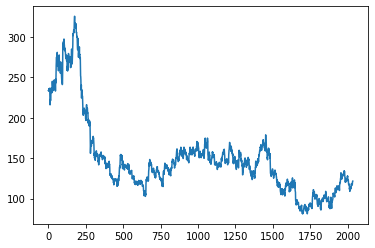

In [6]:
plt.plot(df1)
plt.show()

In [7]:
scaler=MinMaxScaler()
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [9]:
training_size=int(len(df1)*0.70)
testing_size=len(df1)-training_size
training_data,testing_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
training_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.32618464],
       [0.32271242],
       [0.3247549 ]])

In [11]:
training_data.shape , testing_data.shape

((1424, 1), (611, 1))

In [12]:
def create_dataset(dataset, time_step=1):
    data_x, data_y = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        data_x.append(a)
        data_y.append(dataset[i+time_step,0])
    #print(len(data_x),len(data_y))
    return np.array(data_x), np.array(data_y)

In [13]:
time_step = 100
x_train, y_train = create_dataset(training_data,time_step)
x_test, y_test = create_dataset(testing_data,time_step)


In [14]:
x_train

array([[0.62418301, 0.62214052, 0.62622549, ..., 0.83455882, 0.86213235,
        0.85273693],
       [0.62214052, 0.62622549, 0.63378268, ..., 0.86213235, 0.85273693,
        0.87111928],
       [0.62622549, 0.63378268, 0.62234477, ..., 0.85273693, 0.87111928,
        0.84497549],
       ...,
       [0.26041667, 0.2563317 , 0.24652778, ..., 0.33415033, 0.33986928,
        0.34681373],
       [0.2563317 , 0.24652778, 0.23611111, ..., 0.33986928, 0.34681373,
        0.3500817 ],
       [0.24652778, 0.23611111, 0.25204248, ..., 0.34681373, 0.3500817 ,
        0.32618464]])

In [30]:
y_train

array([0.87111928, 0.84497549, 0.84027778, ..., 0.3500817 , 0.32618464,
       0.32271242])

In [15]:
x_train.shape, y_train.shape

((1323, 100), (1323,))

In [16]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [17]:
x_train.shape

(1323, 100, 1)

In [18]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 14s 343ms/step - loss: 0.0190 - val_loss: 0.0064
Epoch 2/100
21/21 [==============================] - 6s 267ms/step - loss: 0.0025 - val_loss: 8.3129e-04
Epoch 3/100
21/21 [==============================] - 5s 253ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 4/100
21/21 [==============================] - 6s 270ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 5/100
21/21 [==============================] - 5s 258ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 6/100
21/21 [==============================] - 5s 254ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 7/100
21/21 [==============================] - 5s 257ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 8/100
21/21 [==============================] - 6s 265ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/100
21/21 [==============================] - 6s 265ms/step - loss: 0.0014 - val_loss: 8.7434e-04
Epoch 10/100
21/21 [==============================] - 6s 264ms/step - loss: 0.0012

21/21 [==============================] - 5s 252ms/step - loss: 2.7565e-04 - val_loss: 2.9758e-04
Epoch 77/100
21/21 [==============================] - 5s 243ms/step - loss: 2.6193e-04 - val_loss: 3.4095e-04
Epoch 78/100
21/21 [==============================] - 5s 242ms/step - loss: 2.7420e-04 - val_loss: 2.1892e-04
Epoch 79/100
21/21 [==============================] - 7s 326ms/step - loss: 2.8391e-04 - val_loss: 2.2942e-04
Epoch 80/100
21/21 [==============================] - 5s 257ms/step - loss: 3.2243e-04 - val_loss: 2.9325e-04
Epoch 81/100
21/21 [==============================] - 6s 280ms/step - loss: 2.4873e-04 - val_loss: 2.2432e-04
Epoch 82/100
21/21 [==============================] - 6s 284ms/step - loss: 2.5136e-04 - val_loss: 2.2861e-04
Epoch 83/100
21/21 [==============================] - 5s 239ms/step - loss: 2.3907e-04 - val_loss: 2.9814e-04
Epoch 84/100
21/21 [==============================] - 5s 238ms/step - loss: 2.4399e-04 - val_loss: 2.3871e-04
Epoch 85/100
21/21 [===

In [23]:
tf.__version__

'2.6.0'

In [24]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [25]:
train_predict

array([[0.82427186],
       [0.8468146 ],
       [0.8445766 ],
       ...,
       [0.33568627],
       [0.34184542],
       [0.33296466]], dtype=float32)

In [26]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [27]:
train_predict

array([[282.73175],
       [288.25018],
       [287.70236],
       ...,
       [163.12599],
       [164.63376],
       [162.45975]], dtype=float32)

#Root mean squared error

In [28]:
math.sqrt(mean_squared_error(y_train,train_predict))

163.464206641708

In [29]:
math.sqrt(mean_squared_error(y_test,test_predict))

108.0452807410922

In [33]:
df1.shape

(2035, 1)

In [32]:
look_back = 100
train_predict_plot = np.empty_like(df1)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict
test_predict_plot = np.empty_like(df1)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back * 2) + 1: len(df1) - 1, :] = test_predict

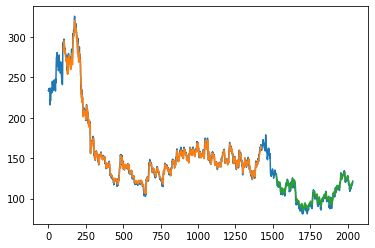

In [35]:
#plotting the new graph
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [36]:
print(len(testing_data))

611


In [37]:
x_input = testing_data[341:].reshape(1,-1)
x_input.shape

(1, 270)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.08721405228758167,
 0.08986928104575165,
 0.10498366013071897,
 0.08905228758169931,
 0.10355392156862742,
 0.10375816993464049,
 0.12275326797385616,
 0.1090686274509804,
 0.09660947712418294,
 0.10641339869281041,
 0.10457516339869277,
 0.11049836601307189,
 0.11274509803921567,
 0.0980392156862745,
 0.09987745098039214,
 0.08925653594771238,
 0.07475490196078427,
 0.08169934640522875,
 0.08925653594771238,
 0.09068627450980393,
 0.08129084967320255,
 0.08823529411764702,
 0.08455882352941174,
 0.07945261437908496,
 0.08374183006535946,
 0.0778186274509804,
 0.09824346405228757,
 0.090890522875817,
 0.09007352941176466,
 0.09558823529411759,
 0.06862745098039214,
 0.06372549019607837,
 0.04942810457516339,
 0.04799836601307189,
 0.04534313725490191,
 0.044321895424836555,
 0.03941993464052285,
 0.03799019607843135,
 0.04656862745098034,
 0.05085784313725489,
 0.07209967320261434,
 0.065359477124183,
 0.07230392156862747,
 0.07802287581699341,
 0.07741013071895425,
 0.0608660130718

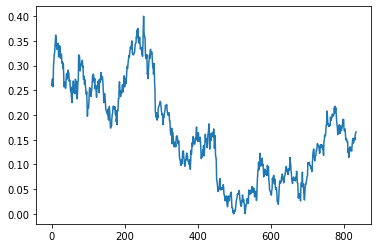

In [45]:
df2 = df1.tolist()
plt.plot(df2[1200:])
plt.show()

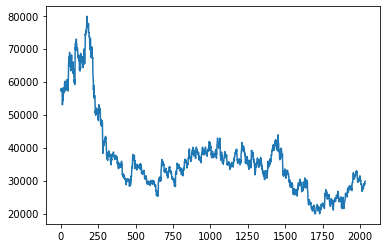

In [47]:
df2=scaler.inverse_transform(df2).tolist()
plt.plot(df2)
plt.show()

# Thank You..